# Partial Regression

만약 회귀 분석할 때 새로운 독립 변수를 추가해서 다시 회귀 분석을 한다면 그 전에 기존의 회귀 분석으로 구했던 가중치 벡터의 값을 달라질까 달라지지 않을까?

(증명식 생략)

결과적으로 **회귀분석을 할때 새로운 독립변수를 추가해서 다시 회귀분석을 한다면 그 전에 기존의 회귀분석으로 구했던 가중치 벡터의 값은 달라진다.**

하지만, 다음과 같은 경우에는 두 회귀분석 결과가 같다.

(1) $w'=0$ 즉, $X_2$와 $y$의 상관관계가 없는 경우

(2) $X_1^TX_2=0$ 즉, 독립변수 $X_1$과 $x_2$의 상관관계가 없는 경우

# Frisch–Waugh–Lovell 정리

- 다른 독립 변수의 영향을 모두 제거한 후 남은 데이터만으로 회귀 분석을 한 결과는 모든 독립 변수를 같이 사용하여 회귀 분석한 결과와 같다.

# Partial Regression Plot

독립변수의 갯수가 많은 경우에 특정한 하나의 독립변수의 영향력을 시각화하는 방법이 Partial Regression Plot이다. Partial Regression Plot은 Added Variable Plot이라고도 한다.

Partial Regression Plot을 그리기 위해서는 3번의 선형회귀를 해야한다.

(1) 특정한 독립변수 $z$ 를 제외한 나머지 독립변수 $x$ 들로 종속변수 $y$ 를 선형회귀하여 잔차  $y∗$ 를 구한다.<br/>
(2) 특정한 독립변수 $z$ 를 제외한 나머지 독립변수 $x$ 들로 특정한 독립변수 $z$ 를 선형회귀하여 잔차 $z∗$ 를 구한다.<br/>
(3) 잔차 $z∗$ 를 독립변수로, 잔차 $y∗$ 를 종속변수로 하여 선형회귀한다.

이렇게 구한 $z∗$ , $y∗$ 의 스캐터 플롯과 회귀 분석 결과를 나타낸 것이 Partial Regression Plot이다.

In [5]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
import statsmodels.api as sm
import pandas as pd
import matplotlib.pylab as plt

boston = load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

하나의 변수에 대해 `plot_regree_exog` 명령을 실행하면 Partial Regression Plot을 포함한 분석 결과를 보여준다.

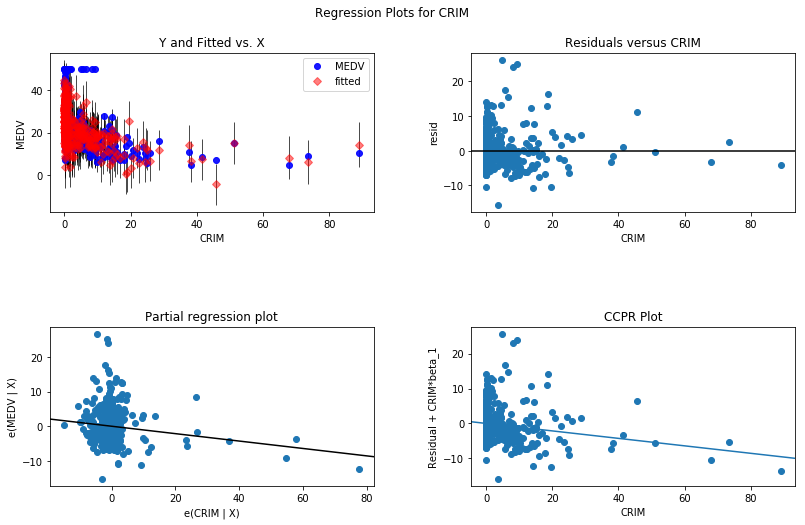

In [12]:
fig = sm.graphics.plot_regress_exog(result_boston, "CRIM")
fig.set_size_inches(12, 8)
plt.show()

`sm.graphics.plot_partregress` 명령을 쓰면 partial regression plot만을 그릴 수 있다. 이 때 인수 `ret_coords=True`로 하면 잔차 데이터를 반환한다.

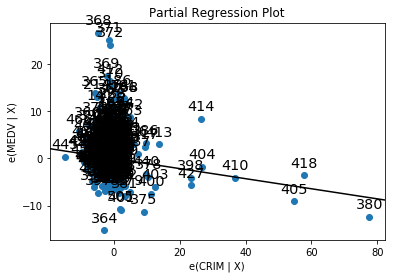

In [25]:
p, resids =\
sm.graphics.plot_partregress("MEDV", "CRIM", \
list(set(df.columns).difference(set(["MEDV", "CRIM"]))), \
data=df, ret_coords=True)
plt.show()

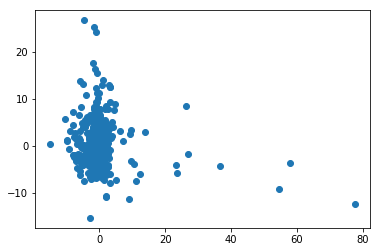

In [26]:
plt.plot(resids[0], resids[1], 'o')
plt.show()

`sm.graphics.plot_partregress_grid` 명령을 쓰면 전체 데이터에 대해 한번에 partial regression plot을 그릴 수 있다.

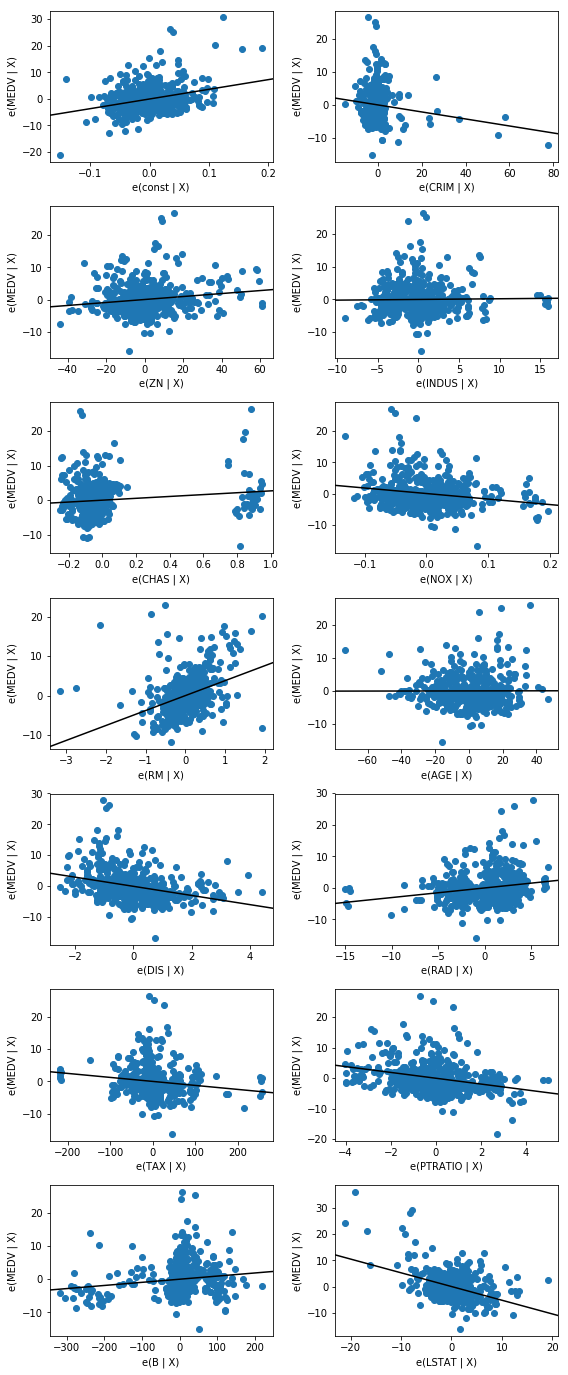

In [28]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

# CCPR 플롯

CCPR(Component-Component plus Residual) 플롯도 Partial Regression Plot과 마찬가지로 특정한 하나의 변수의 영향을 살펴보기 위한 것이다.

다음과 같은 회귀 모형이 있다고 하자.
$$y = \hat{y} + e = w_1 x_1 +  w_2 x_2 +  \cdots + w_i x_i +  \cdots +  w_K x_K + e$$

CCPR 플롯은 이 성분 중에서
$$x_i \;\; \text{ vs } \;\; w_i x_i + e$$
를 스캐터 플롯으로 그린 것이다.

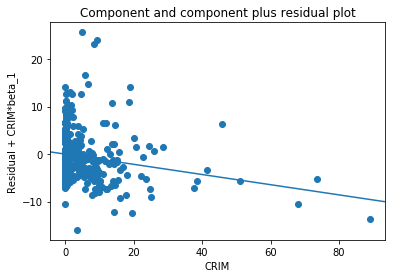

In [29]:
sm.graphics.plot_ccpr(result_boston, "CRIM")
plt.show()

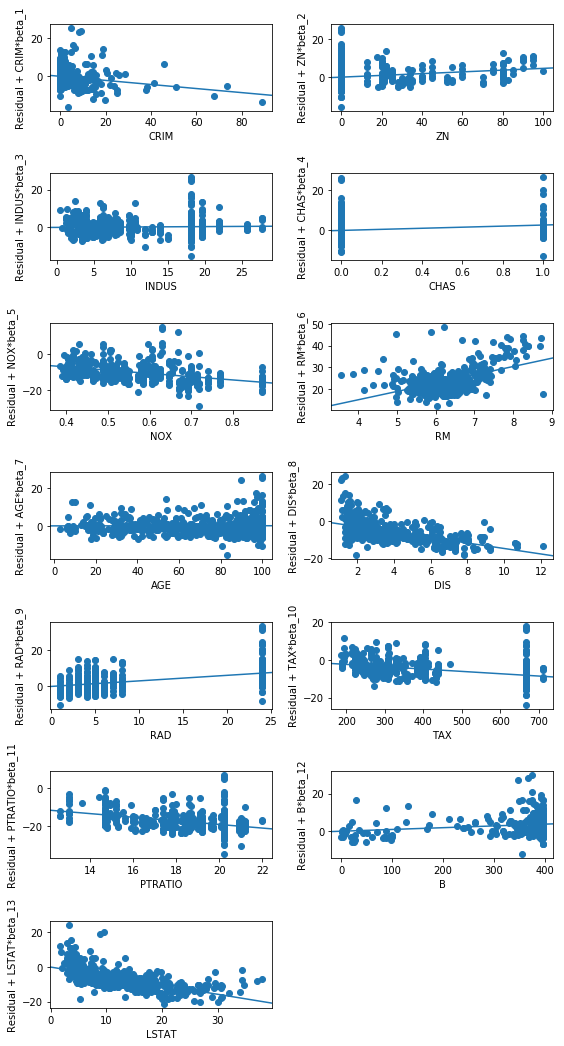

In [30]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

CCPR 플롯에서는 Partial Regression Plot과 달리 독리변수가 원래의 값 그래도 나타난다.